In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
# import data
data = pd.read_csv('/Users/jimliu/Learning/Kaggle/House Price Predicting /all/train.csv',
                  dtype = {'MSSubClass':str, 'OverallQual':str, 'OverallCond':str})

In [5]:
# check Y distribution
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [6]:
data['YearRemodAdd'].sample(5)

7       1973
396     1972
1184    1963
1316    2008
844     1950
Name: YearRemodAdd, dtype: int64

In [7]:
data['MSSubClass'].dtypes

dtype('O')

In [8]:
print (data['SalePrice'].groupby(data['MSSubClass']).mean())
print (data['SalePrice'].groupby(data['Neighborhood']).mean())
print (data['SalePrice'].groupby(data['Exterior1st']).mean())

MSSubClass
120    200779.080460
160    138647.380952
180    102300.000000
190    129613.333333
20     185224.811567
30      95829.724638
40     156125.000000
45     108591.666667
50     143302.972222
60     239948.501672
70     166772.416667
75     192437.500000
80     169736.551724
85     147810.000000
90     133541.076923
Name: SalePrice, dtype: float64
Neighborhood
Blmngtn    194870.882353
Blueste    137500.000000
BrDale     104493.750000
BrkSide    124834.051724
ClearCr    212565.428571
CollgCr    197965.773333
Crawfor    210624.725490
Edwards    128219.700000
Gilbert    192854.506329
IDOTRR     100123.783784
MeadowV     98576.470588
Mitchel    156270.122449
NAmes      145847.080000
NPkVill    142694.444444
NWAmes     189050.068493
NoRidge    335295.317073
NridgHt    316270.623377
OldTown    128225.300885
SWISU      142591.360000
Sawyer     136793.135135
SawyerW    186555.796610
Somerst    225379.837209
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Name

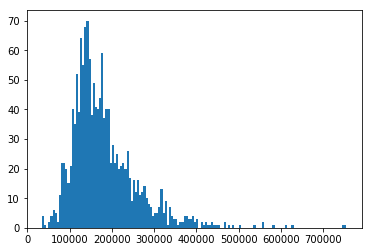

In [9]:
# histogram of price

plt.hist(data['SalePrice'], bins = int((data['SalePrice'].max() - data['SalePrice'].min())/5000));


# check out duplicates

In [10]:
data.loc[data.duplicated()]

# no duplicates

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


# Check out percentage of missing values

In [11]:

# check out missings

missing = data.isnull().sum()
x = missing.loc[missing > 0]/len(data)

# variables would be deleted
del_vars = list(x.loc[x > 0.5].index)

# Fix missings

In [12]:
fix_missing = list(x.loc[x <= 0.5].index)

for a in fix_missing:
    if data[a].dtype == 'O':
        data[a].fillna("Missing", inplace = True)
    else:
        data[a].fillna(data[a].mean(), inplace = True)

# Drop variables with high percentage of missing values
data.drop(del_vars , axis = 1, inplace = True)

In [27]:
# recode 
data2 = pd.get_dummies(data)

False

In [39]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


X = data2.drop('SalePrice', axis = 1)
y = data2['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X,y)

gbrt = GradientBoostingRegressor(max_depth = 2 , n_estimators=2000, subsample = 0.8)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=2000, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=0.8, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [40]:
errors =[mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]
best = np.argmin(errors)

In [41]:
best

1143